In [ ]:
''' 
Since now we have:
-Histogram equalization using YCR_CB
-Gamma correction
-agcwd (adaptive gamma correction)
-another weird histogram equalization
-Ying_2017_CAIP
-CLAHE (Contrast-limited adaptive histogram equalization) 
-MSRCP


'''

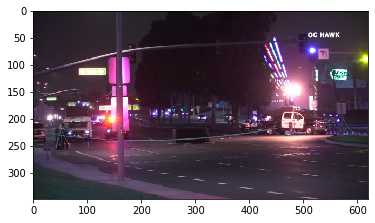

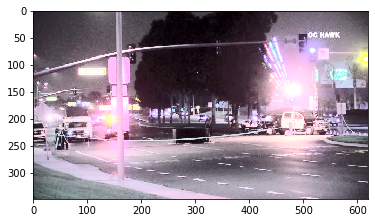

In [6]:
# RGB Image Histogram Equalization
import cv2
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def hisEqulColor(img):
    ycrcb=cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
    channels=cv2.split(ycrcb)
    cv2.equalizeHist(channels[0],channels[0])
    cv2.merge(channels,ycrcb)
    cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2BGR,img)
    return img


fname='./your.jpg'

img=cv2.imread(fname)
imgplot = plt.imshow(img)
plt.show()

img2=hisEqulColor(img)
imgplot = plt.imshow(img2)

plt.show()

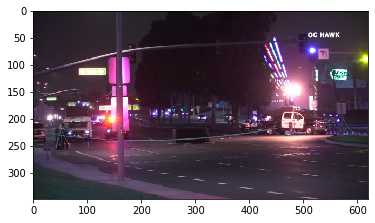

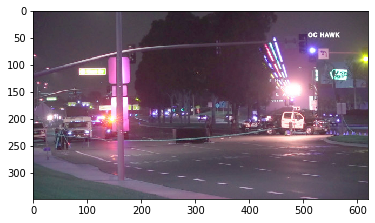

In [2]:
# OPENCV Gamma correction
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def adjust_gamma(image, gamma=1.0):

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

x = './your.jpg'  #location of the image
original = cv2.imread(x)
imgplot = plt.imshow(original)
plt.show()

gamma = 1.5                                   # change the value here to get different result
adjusted = adjust_gamma(original, gamma=gamma)
imgplot = plt.imshow(adjusted)
plt.show()

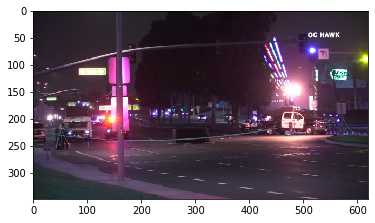

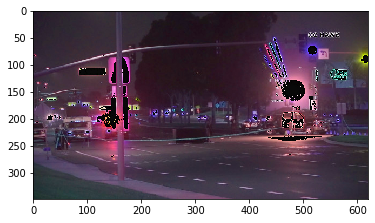

In [3]:
# brightness augmentation, wrong
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = cv2.imread('./your.jpg') #load rgb image
imgplot = plt.imshow(img)
plt.show()


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #convert it to hsv
hsv[:,:,2] += 10

img_bright = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
imgplot = plt.imshow(img_bright)
plt.show()


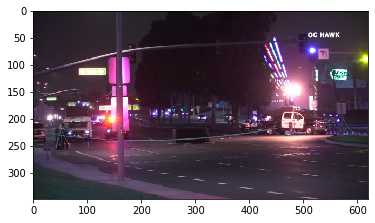

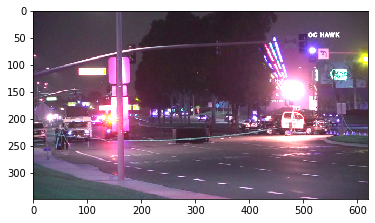

In [4]:
# brightness augmentation, Too slow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = cv2.imread('./your.jpg') #load rgb image
imgplot = plt.imshow(img)
plt.show()

new_image = np.zeros(img.shape, img.dtype)
alpha = 1.5 # Simple contrast control
beta = 10    # Simple brightness control

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)


imgplot = plt.imshow(new_image)
plt.show()

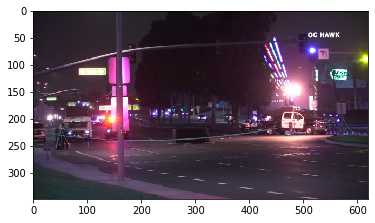

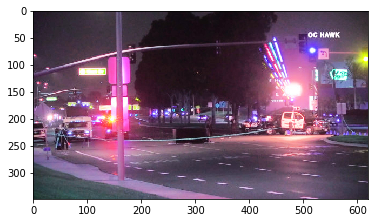

In [5]:
# Adaptive gamma correction based on the reference.
# Reference:
#   S. Huang, F. Cheng and Y. Chiu, "Efficient Contrast Enhancement Using Adaptive Gamma Correction With
#   Weighting Distribution," in IEEE Transactions on Image Processing, vol. 22, no. 3, pp. 1032-1041,
#   March 2013. doi: 10.1109/TIP.2012.2226047
# Revised from https://github.com/mss3331/AGCWD/blob/master/AGCWD.m

#from https://github.com/qyou/AGCWD/blob/master/agcwd.py

import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


def agcwd(image, w=0.5):
    is_colorful = len(image.shape) >= 3
    img = extract_value_channel(image) if is_colorful else image
    img_pdf = get_pdf(img)
    max_intensity = np.max(img_pdf)
    min_intensity = np.min(img_pdf)
    w_img_pdf = max_intensity * (((img_pdf - min_intensity) / (max_intensity - min_intensity)) ** w)
    w_img_cdf = np.cumsum(w_img_pdf) / np.sum(w_img_pdf)
    l_intensity = np.arange(0, 256)
    l_intensity = np.array([255 * (e / 255) ** (1 - w_img_cdf[e]) for e in l_intensity], dtype=np.uint8)
    enhanced_image = np.copy(img)
    height, width = img.shape
    for i in range(0, height):
        for j in range(0, width):
            intensity = enhanced_image[i, j]
            enhanced_image[i, j] = l_intensity[intensity]
    enhanced_image = set_value_channel(image, enhanced_image) if is_colorful else enhanced_image
    return enhanced_image


def extract_value_channel(color_image):
    color_image = color_image.astype(np.float32) / 255.
    hsv = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)
    v = hsv[:, :, 2]
    return np.uint8(v * 255)


def get_pdf(gray_image):
    height, width = gray_image.shape
    pixel_count = height * width
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    return hist / pixel_count


def set_value_channel(color_image, value_channel):
    value_channel = value_channel.astype(np.float32) / 255
    color_image = color_image.astype(np.float32) / 255.
    color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)
    color_image[:, :, 2] = value_channel
    color_image = np.array(cv2.cvtColor(color_image, cv2.COLOR_HSV2BGR) * 255, dtype=np.uint8)
    return color_image


def main():
    
    img = cv2.imread('./your.jpg')
    imgplot = plt.imshow(img)
    plt.show()
    
    enhanced_image = agcwd(img,0.5)
    imgplot = plt.imshow(enhanced_image)
    plt.show()

main()

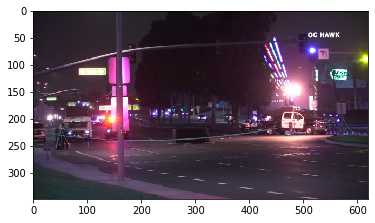

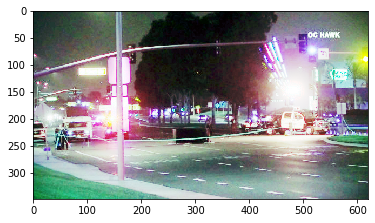

In [7]:
# Histrogram equalization from 
# https://github.com/AndyHuang1995/Image-Contrast-Enhancement/blob/master/he.py

import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from skimage import exposure as ex
def he(img):
    outImg = np.zeros((img.shape[0],img.shape[1],3))
    for channel in range(img.shape[2]):
        outImg[:, :, channel] = ex.equalize_hist(img[:, :, channel])*255

    outImg[outImg>255] = 255
    outImg[outImg<0] = 0
    return outImg.astype(np.uint8)

img = cv2.imread('./your.jpg')
imgplot = plt.imshow(img)
plt.show()

enhanced_image = he(img)
imgplot = plt.imshow(enhanced_image)
plt.show()

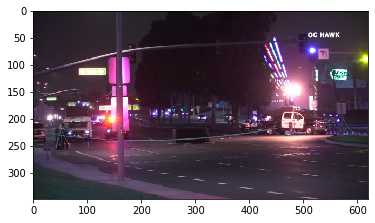

/home/test/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/test/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


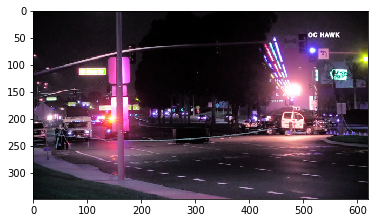

In [6]:
# dynamic histogram equalization from https://github.com/AndyHuang1995/Image-Contrast-Enhancement/blob/master/dhe.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import imageio
import scipy, scipy.misc, scipy.signal
import cv2
import sys

def build_is_hist(img):
    hei = img.shape[0]
    wid = img.shape[1]
    ch = img.shape[2]
    Img = np.zeros((hei+4, wid+4, ch))
    for i in range(ch):
        Img[:,:,i] = np.pad(img[:,:,i], (2,2), 'edge')
    hsv = (matplotlib.colors.rgb_to_hsv(Img))
    hsv[:,:,0] = hsv[:,:,0] * 255
    hsv[:,:,1] = hsv[:,:,1] * 255
    hsv[hsv>255] = 255
    hsv[hsv<0] = 0
    hsv = hsv.astype(np.uint8).astype(np.float64)
    fh = np.array([[-1.0,0.0,1.0],[-2.0,0.0,2.0],[-1.0,0.0,1.0]])
    fv = fh.conj().T
    
    H = hsv[:,:,0]
    S = hsv[:,:,1]
    I = hsv[:,:,2]

    dIh = scipy.signal.convolve2d(I, np.rot90(fh, 2), mode='same')
    dIv = scipy.signal.convolve2d(I, np.rot90(fv, 2), mode='same')
    dIh[dIh==0] = 0.00001
    dIv[dIv==0] = 0.00001
    dI = np.sqrt(dIh**2+dIv**2).astype(np.uint32)
    di = dI[2:hei+2,2:wid+2]
    
    dSh = scipy.signal.convolve2d(S, np.rot90(fh, 2), mode='same')
    dSv = scipy.signal.convolve2d(S, np.rot90(fv, 2), mode='same')
    dSh[dSh==0] = 0.00001
    dSv[dSv==0] = 0.00001
    dS = np.sqrt(dSh**2+dSv**2).astype(np.uint32)
    ds = dS[2:hei+2,2:wid+2]

    
    h = H[2:hei+2,2:wid+2]
    s = S[2:hei+2,2:wid+2]
    i = I[2:hei+2,2:wid+2].astype(np.uint8)
    
    Imean = scipy.signal.convolve2d(I,np.ones((5,5))/25, mode='same')
    Smean = scipy.signal.convolve2d(S,np.ones((5,5))/25, mode='same')
    
    Rho = np.zeros((hei+4,wid+4))
    for p in range(2,hei+2):
        for q in range(2,wid+2):
            tmpi = I[p-2:p+3,q-2:q+3]
            tmps = S[p-2:p+3,q-2:q+3]
            corre = np.corrcoef(tmpi.flatten('F'),tmps.flatten('F'))
            Rho[p,q] = corre[0,1]
    
    rho = np.abs(Rho[2:hei+2,2:wid+2])
    rho[np.isnan(rho)] = 0
    rd = (rho*ds).astype(np.uint32)
    Hist_I = np.zeros((256,1))
    Hist_S = np.zeros((256,1))
    
    for n in range(0,255):
        temp = np.zeros(di.shape)
        temp[i==n] = di[i==n]
        Hist_I[n+1] = np.sum(temp.flatten('F'))
        temp = np.zeros(di.shape)
        temp[i==n] = rd[i==n]
        Hist_S[n+1] = np.sum(temp.flatten('F'))

    return Hist_I, Hist_S

def dhe(img, alpha=0.5):
    
    hist_i, hist_s = build_is_hist(img)
    hist_c = alpha*hist_s + (1-alpha)*hist_i
    hist_sum = np.sum(hist_c)
    hist_cum = hist_c.cumsum(axis=0)
    
    hsv = matplotlib.colors.rgb_to_hsv(img)
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    i = hsv[:,:,2].astype(np.uint8)
    
    c = hist_cum / hist_sum
    s_r = (c * 255)
    i_s = np.zeros(i.shape)
    for n in range(0,255):
        i_s[i==n] = s_r[n+1]/255.0
    i_s[i==255] = 1
    hsi_o = np.stack((h,s,i_s), axis=2)
    result = matplotlib.colors.hsv_to_rgb(hsi_o)
    
    result = result * 255
    result[result>255] = 255
    result[result<0] = 0
    return result.astype(np.uint8)

import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


img = cv2.imread('./your.jpg')
imgplot = plt.imshow(img)
plt.show()

enhanced_image = dhe(img,alpha=0.1)
imgplot = plt.imshow(enhanced_image)
plt.show()

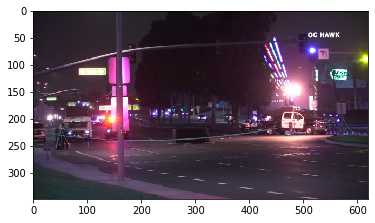

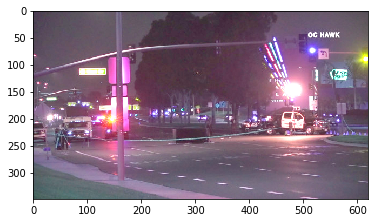

In [2]:
# from https://github.com/AndyHuang1995/Image-Contrast-Enhancement/blob/master/ying.py

from ying import Ying_2017_CAIP
import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = cv2.imread('./your.jpg')
imgplot = plt.imshow(img)
plt.show()

# pip install scipy==1.1.0 to make it work

enhanced_image = Ying_2017_CAIP(img)
imgplot = plt.imshow(enhanced_image)
plt.show()

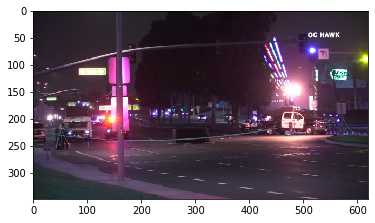

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


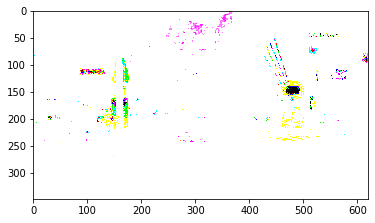

In [4]:
# BPDFHE from https://github.com/msrinivaskgp/BPDFHE-Python/blob/master/fBPDFHE.py

import numpy as np
from skimage import data
import matplotlib.pyplot as plt
import time
from PIL import Image
import skfuzzy as fuzz
import math
import timeit

    
def bpdfhe(image):
    
    opimg = np.zeros_like(image)
 
    array1 = np.zeros(256*4+1, dtype = int)
    hist = array1[1:257]
    deltahist = array1[257:513]
    delta2hist = array1[513:769]
    histmax = array1[769:]
    

    hist, bin_edges = np.histogram(image, bins=256)

    x_qual = np.arange(0, 11, 1)

    membership= fuzz.trimf(x_qual, [0, 5, 10])

    fuzzyhist = np.zeros((np.size(hist)+np.size(membership)-1,1)).T;


    for counter in range(np.size(membership)):

        fuzzyhist = fuzzyhist + membership[counter]*np.concatenate((np.zeros(counter+1-1), hist, np.zeros(np.size(membership)-counter-1)),axis=0)

    fuzzyhist = fuzzyhist.T[math.ceil(np.size(membership)/2):-math.floor(np.size(membership)/2)+1]

    for i in range(255):
        deltahist[i] = (fuzzyhist[i+1]-fuzzyhist[i-1])/2
        delta2hist[i] = fuzzyhist[i+1]-2*fuzzyhist[i]+fuzzyhist[i-1]
    for i in range(255):
        if (deltahist[i+1]*deltahist[i-1]<0 and delta2hist[i]<0):
            histmax[i] = 1

    parts = np.where(histmax)[0]
    x = np.append(0,parts)
    x = np.append(x,255)

    span = np.zeros(x.shape[0], dtype = float) 
    M = np.zeros(x.shape[0], dtype = float) 
    factor = np.zeros(x.shape[0], dtype = float) 
    rang = np.zeros(x.shape[0], dtype = float) 
    start = np.zeros(x.shape[0], dtype = float) 

    Msum = np.cumsum(hist)

    for i in range(x.shape[0]):
        span[i-1]   = x[i] - x[i-1]
        if (span[i-1]<0):
            span[i-1]=1
        M[i-1] = Msum[x[i]]-Msum[x[i-1]]
        if (M[i-1]<0):
            M[i-1]=1
        factor[i-1] = span[i-1]*math.log10(M[i-1])

    factorsum = sum(factor)

    for i in range(x.shape[0]):    
        rang[i-1] = 255*factor[i-1]/factorsum

    start = np.cumsum(rang)
    start = np.append(0,start)
    start = start.astype(int)

    opimg = np.zeros_like(image)
    img2 = np.zeros_like(image)
    small = np.amin(image)
    big = np.amax(image)

    y = np.zeros(hist.shape, dtype = float) 
    for i in range(start.shape[0]):

        y[start[i-1]:start[i]] = start[i-1]+rang[i-1]/M[i-1]*np.cumsum(hist[start[i-1]:start[i]])


    opimg = y[image]
    
    return opimg

import numpy as np
import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = Image.open("./your.jpg")
imgplot = plt.imshow(img)
plt.show()

# pip install -U scikit-fuzzy

image = np.array(image)
    
opimg = bpdfhe(image)

imgplot = plt.imshow(opimg)
plt.show()


In [ ]:
from ying import Ying_2017_CAIP
import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = cv2.imread('./your.jpg')
imgplot = plt.imshow(img)
plt.show()

# pip install scipy==1.1.0 to make it work

enhanced_image = Ying_2017_CAIP(img)
imgplot = plt.imshow(enhanced_image)
plt.show()

image = Image.open("./your.jpg")
imgplot = plt.imshow(img)
plt.show()

image = np.array(image)
    
opimg = bpdfhe(image)

imgplot = plt.imshow(enhanced_image)
plt.show()


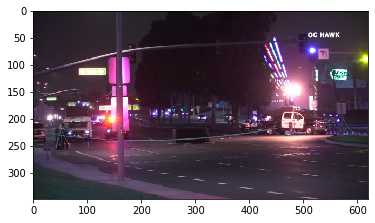

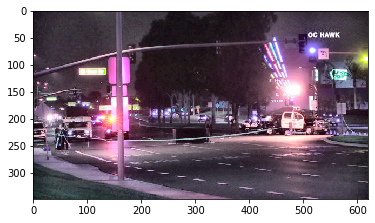

In [2]:
# from https://www.programcreek.com/python/example/89353/cv2.createCLAHE,
# CLAHE (Contrast-limited adaptive histogram equalization) 

import numpy as np
import cv2

def enhance(image, clip_limit=3):
    # convert image to LAB color model
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # split the image into L, A, and B channels
    l_channel, a_channel, b_channel = cv2.split(image_lab)

    # apply CLAHE to lightness channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
    cl = clahe.apply(l_channel)

    # merge the CLAHE enhanced L channel with the original A and B channel
    merged_channels = cv2.merge((cl, a_channel, b_channel))

    # convert iamge from LAB color model back to RGB color model
    final_image = cv2.cvtColor(merged_channels, cv2.COLOR_LAB2BGR)
    return final_image

import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = cv2.imread('./your.jpg')
imgplot = plt.imshow(img)
plt.show()

enhanced_image = enhance(img)
imgplot = plt.imshow(enhanced_image)
plt.show()

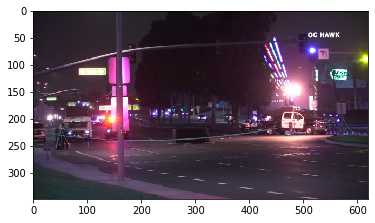

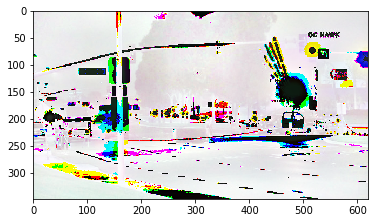

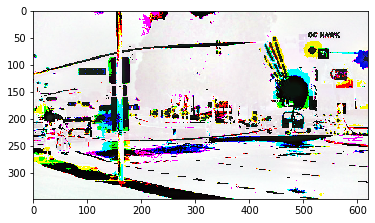

In [3]:
# RETINEX (NOT WORKING) from 
# https://github.com/lysukhin/python-computer-vision/blob/master/retinex/retinex.py

import cv2
import numpy as np


class Retinex:

    def __init__(self):
        self.kernels = []
        self.sigmas = []
        self.weights = []

    @staticmethod
    def odd(x):
        """
        #TODO
        :param x: 
        :return: 
        """
        return x + int(x % 2 == 0)

    @staticmethod
    def cast_uint8(image):
        """
        #TODO
        :param image: 
        :return: 
        """
        return np.uint8(image * (255. - 0.) / (image.max() - image.min()))

    def apply(self, image, kernels=(11,), sigmas=(3,), weights=(1,)):
        """
        #TODO
        :param image: 
        :param kernels: 
        :param sigmas: 
        :param weights: 
        :return: 
        """
        if not isinstance(kernels, (list, tuple)):
            self.kernels = (kernels,)
        else:
            self.kernels = kernels
        if not isinstance(sigmas, (list, tuple)):
            self.sigmas = (sigmas,)
        else:
            self.sigmas = sigmas
        if not isinstance(weights, (list, tuple)):
            self.weights = (weights,)
        else:
            self.weights = weights

        if len(self.kernels) != len(self.sigmas):
            if len(self.kernels) == 1:
                self.kernels = tuple([self.kernels[0]] * len(self.sigmas))
            elif len(self.sigmas) == 1:
                self.sigmas = tuple([self.sigmas[0]] * len(self.kernels))
            else:
                raise ValueError("Parameters mismatch: {} (# kernels) != {} (# sigmas)".format(len(self.kernels),
                                                                                               len(self.sigmas)))

        if len(self.weights) == 1 and len(self.kernels) > 1:
            self.weights = tuple([1. / len(self.kernels)] * len(self.kernels))

        self.kernels = tuple([self.odd(kernel) for kernel in self.kernels])

        low_freqs = [cv2.GaussianBlur(image, ksize=(k, k), sigmaX=s) for k, s in zip(self.kernels, self.sigmas)]
        results = [weight * (np.log1p(image) - np.log1p(low_freq)) for low_freq, weight in zip(low_freqs, self.weights)]

        return self.cast_uint8(sum(results))
    
import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#image = np.uint8(plt.imread("./your.jpg") * 255)
image = cv2.imread('./your.jpg')
imgplot = plt.imshow(image)
plt.show()

retinex = Retinex()

# Single-scale retinex
image_retinex_SSR = retinex.apply(image, kernels=151, sigmas=151)
imgplot = plt.imshow(image_retinex_SSR)
plt.show()

# Multi-scale retinex
image_retinex_MSR = retinex.apply(image, kernels=151, sigmas=(5, 80, 151))
imgplot = plt.imshow(image_retinex_MSR)
plt.show()



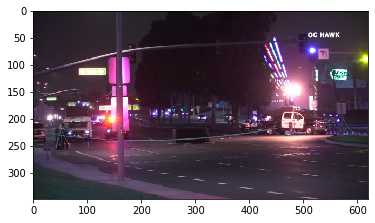

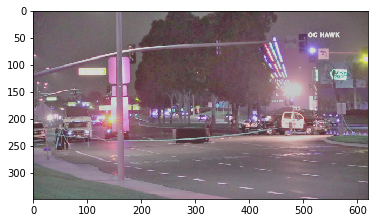

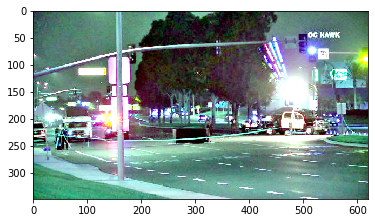

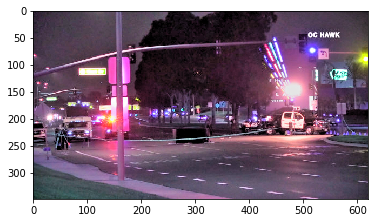

"\ncv2.imshow('retinex', img_msrcr)\ncv2.imshow('Automated retinex', img_amsrcr)\ncv2.imshow('MSRCP', img_msrcp)\ncv2.waitKey()\n"

In [5]:
# RETINEX from https://github.com/dongb5/Retinex/blob/master/


import numpy as np
import cv2

def singleScaleRetinex(img, sigma):

    retinex = np.log10(img) - np.log10(cv2.GaussianBlur(img, (0, 0), sigma))

    return retinex

def multiScaleRetinex(img, sigma_list):

    retinex = np.zeros_like(img)
    for sigma in sigma_list:
        retinex += singleScaleRetinex(img, sigma)

    retinex = retinex / len(sigma_list)

    return retinex

def colorRestoration(img, alpha, beta):

    img_sum = np.sum(img, axis=2, keepdims=True)

    color_restoration = beta * (np.log10(alpha * img) - np.log10(img_sum))

    return color_restoration

def simplestColorBalance(img, low_clip, high_clip):    

    total = img.shape[0] * img.shape[1]
    for i in range(img.shape[2]):
        unique, counts = np.unique(img[:, :, i], return_counts=True)
        current = 0
        for u, c in zip(unique, counts):            
            if float(current) / total < low_clip:
                low_val = u
            if float(current) / total < high_clip:
                high_val = u
            current += c
                
        img[:, :, i] = np.maximum(np.minimum(img[:, :, i], high_val), low_val)

    return img    

def MSRCR(img, sigma_list, G, b, alpha, beta, low_clip, high_clip):

    img = np.float64(img) + 1.0

    img_retinex = multiScaleRetinex(img, sigma_list)    
    img_color = colorRestoration(img, alpha, beta)    
    img_msrcr = G * (img_retinex * img_color + b)

    for i in range(img_msrcr.shape[2]):
        img_msrcr[:, :, i] = (img_msrcr[:, :, i] - np.min(img_msrcr[:, :, i])) / \
                             (np.max(img_msrcr[:, :, i]) - np.min(img_msrcr[:, :, i])) * \
                             255
    
    img_msrcr = np.uint8(np.minimum(np.maximum(img_msrcr, 0), 255))
    img_msrcr = simplestColorBalance(img_msrcr, low_clip, high_clip)       

    return img_msrcr

def automatedMSRCR(img, sigma_list):

    img = np.float64(img) + 1.0

    img_retinex = multiScaleRetinex(img, sigma_list)

    for i in range(img_retinex.shape[2]):
        unique, count = np.unique(np.int32(img_retinex[:, :, i] * 100), return_counts=True)
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break
            
        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0
        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.1:
                low_val = u / 100.0
            if u > 0 and c < zero_count * 0.1:
                high_val = u / 100.0
                break
            
        img_retinex[:, :, i] = np.maximum(np.minimum(img_retinex[:, :, i], high_val), low_val)
        
        img_retinex[:, :, i] = (img_retinex[:, :, i] - np.min(img_retinex[:, :, i])) / \
                               (np.max(img_retinex[:, :, i]) - np.min(img_retinex[:, :, i])) \
                               * 255

    img_retinex = np.uint8(img_retinex)
        
    return img_retinex


def MSRCP(img, sigma_list, low_clip, high_clip):

    img = np.float64(img) + 1.0

    intensity = np.sum(img, axis=2) / img.shape[2]    

    retinex = multiScaleRetinex(intensity, sigma_list)

    intensity = np.expand_dims(intensity, 2)
    retinex = np.expand_dims(retinex, 2)

    intensity1 = simplestColorBalance(retinex, low_clip, high_clip)

    intensity1 = (intensity1 - np.min(intensity1)) / \
                 (np.max(intensity1) - np.min(intensity1)) * \
                 255.0 + 1.0

    img_msrcp = np.zeros_like(img)
    
    for y in range(img_msrcp.shape[0]):
        for x in range(img_msrcp.shape[1]):
            B = np.max(img[y, x])
            A = np.minimum(256.0 / B, intensity1[y, x, 0] / intensity[y, x, 0])
            img_msrcp[y, x, 0] = A * img[y, x, 0]
            img_msrcp[y, x, 1] = A * img[y, x, 1]
            img_msrcp[y, x, 2] = A * img[y, x, 2]

    img_msrcp = np.uint8(img_msrcp - 1.0)

    return img_msrcp


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = cv2.imread('./your.jpg')

config = {
    "sigma_list": [15, 80, 250],
    "G"         : 5.0,
    "b"         : 25.0,
    "alpha"     : 125.0,
    "beta"      : 46.0,
    "low_clip"  : 0.01,
    "high_clip" : 0.99
}

img_msrcr = MSRCR(
    img,
    config['sigma_list'],
    config['G'],
    config['b'],
    config['alpha'],
    config['beta'],
    config['low_clip'],
    config['high_clip']
)

img_amsrcr = automatedMSRCR(
    img,
    config['sigma_list']
)

img_msrcp = MSRCP(
    img,
    config['sigma_list'],
    config['low_clip'],
    config['high_clip']        
)    

shape = img.shape


imgplot = plt.imshow(img)
plt.show()

imgplot = plt.imshow(img_msrcr)
plt.show()

imgplot = plt.imshow(img_amsrcr)
plt.show()

imgplot = plt.imshow(img_msrcp)
plt.show()


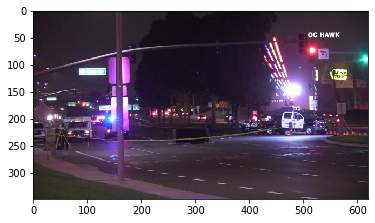

/home/test/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/home/test/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/skimage/color/colorconv.py:264: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/test/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/skimage/color/colorconv.py:272: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


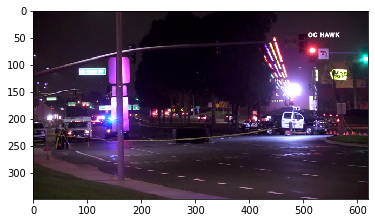

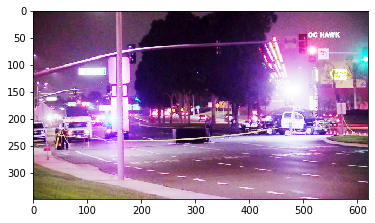

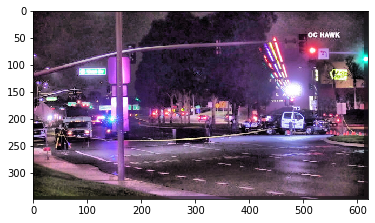

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from skimage import io


fname='./your.jpg'

img = io.imread(fname)
imgplot = plt.imshow(img)
plt.show()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))


# Equalization
img_eq = exposure.equalize_hist(img)


# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)


imgplot = plt.imshow(img_rescale)
plt.show()

imgplot = plt.imshow(img_eq)
plt.show()

imgplot = plt.imshow(img_adapteq)
plt.show()

Original image


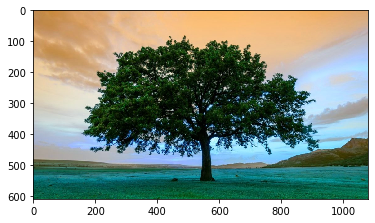

Original image RGB


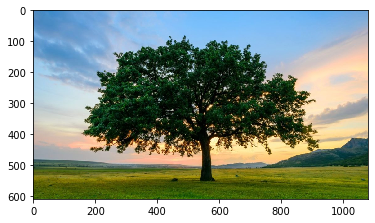

Histogram equalization SKIMAGE


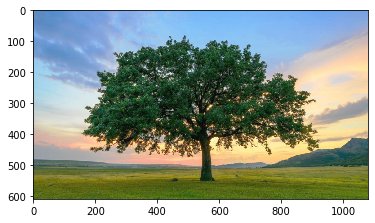

Adaptive Gamma correction


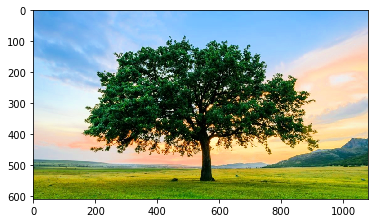

CLAHE


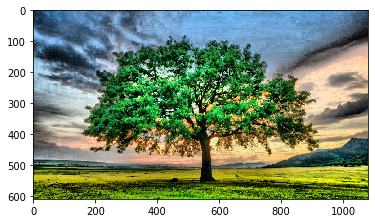

MSRCP


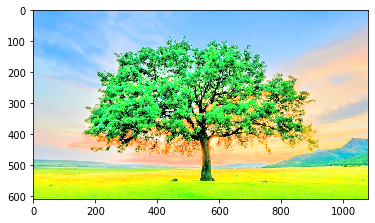

Ying_2017_CAIP


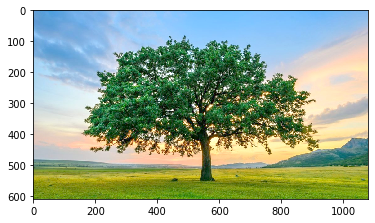

In [8]:
from our_preprocessing import *
from ying import Ying_2017_CAIP
from skimage import exposure
from skimage import io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import cv2
from skimage import exposure

image_path = './tree.jpg'
original_img = cv2.imread(image_path)


print('Original image')
imgplot = plt.imshow(original_img)
plt.show()

print('Original image RGB')
RGB_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(RGB_img)
plt.show()

print('Histogram equalization SKIMAGE')
img = io.imread(image_path)
img_eq = exposure.equalize_hist(img,3)
imgplot = plt.imshow(img_eq)
plt.show()

print('Adaptive Gamma correction')
img_gamma = agcwd(RGB_img, w=0.6)
imgplot = plt.imshow(img_gamma)
plt.show()

print('CLAHE SKIMAGE')
img_clahe2 = exposure.equalize_adapthist(img, clip_limit=0.04)
imgplot = plt.imshow(img_clahe2)
plt.show()

print('MSRCP')
img_msrcp = MSRCP(RGB_img)
imgplot = plt.imshow(img_msrcp)
plt.show()

print('Ying_2017_CAIP')
img_msrcp = Ying_2017_CAIP(RGB_img)
imgplot = plt.imshow(img_msrcp)
plt.show()